<a href="https://colab.research.google.com/github/vimesh630/ML_CW/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports and Mounting to Google Drive

In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# Mount Google Drive to access the preprocessed dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Scaled Features and Target Labels

In [12]:
# Update the paths to point to the location of your files in Google Drive
X_train = pd.read_csv('/content/drive/My Drive/ML Coursework/Preprocessed Dataset/X_train_scaled.csv')
X_test = pd.read_csv('/content/drive/My Drive/ML Coursework/Preprocessed Dataset/X_test_scaled.csv')
X_val = pd.read_csv('/content/drive/My Drive/ML Coursework/Preprocessed Dataset/X_val_scaled.csv')

y_train = pd.read_csv('/content/drive/My Drive/ML Coursework/Preprocessed Dataset/y_train.csv')
y_test = pd.read_csv('/content/drive/My Drive/ML Coursework/Preprocessed Dataset/y_test.csv')
y_val = pd.read_csv('/content/drive/My Drive/ML Coursework/Preprocessed Dataset/y_val.csv')

# Ensure that labels are one-dimensional arrays
y_train = y_train.squeeze()  # Convert from DataFrame to Series if needed
y_test = y_test.squeeze()
y_val = y_val.squeeze()

Address Class Imbalance with SMOTE

In [13]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"Resampled Training Set: {X_train_resampled.shape}, {y_train_resampled.shape}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Resampled Training Set: (51578, 10), (51578,)


Initialize The Neural Network Model

In [14]:
nn_classifier = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Example: Two hidden layers with 100 and 50 neurons
    activation='relu',             # Activation function
    solver='adam',                 # Optimizer
    learning_rate_init=0.001,      # Lower learning rate for better convergence
    max_iter=300,                  # Number of iterations
    alpha=0.0001,                  # Regularization parameter
    random_state=42,               # Random seed for reproducibility
    early_stopping=True            # Enable early stopping
)

Train the Model

In [15]:
print("Training the Neural Network...")
nn_classifier.fit(X_train_resampled, y_train_resampled)

# Extract Training Loss and Validation Score Over Epochs
loss_curve = nn_classifier.loss_curve_

Training the Neural Network...


Plot Training Loss Over Epochs

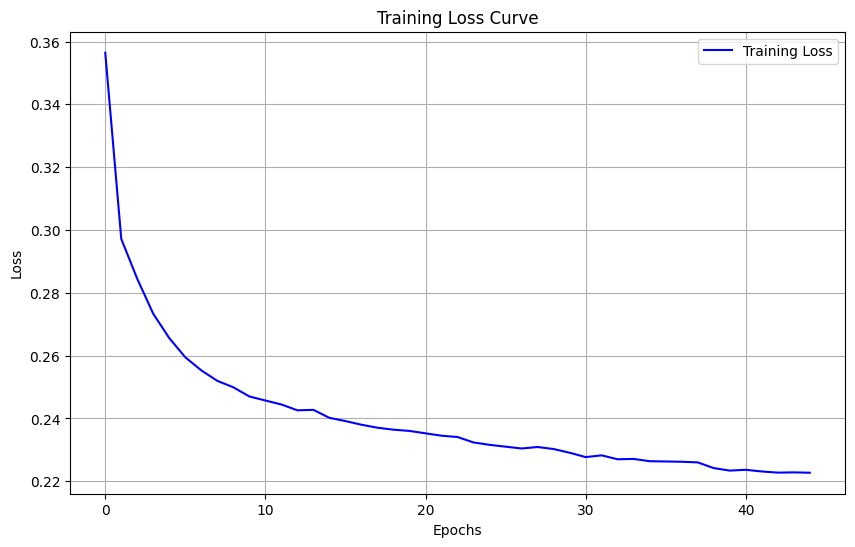

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(loss_curve, label="Training Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

Evaluate the Model on the Validation Set

In [17]:
print("\nEvaluating on the validation set...")
y_val_pred = nn_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_auc = roc_auc_score(y_val, nn_classifier.predict_proba(X_val)[:, 1])
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation AUC-ROC: {val_auc}")
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))


Evaluating on the validation set...
Validation Accuracy: 0.9076289620882536
Validation AUC-ROC: 0.9616651671118573
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      6391
           1       0.87      0.95      0.91      6481

    accuracy                           0.91     12872
   macro avg       0.91      0.91      0.91     12872
weighted avg       0.91      0.91      0.91     12872



Evaluate the Model on the Test Set

In [18]:
print("\nEvaluating on the test set...")
y_test_pred = nn_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, nn_classifier.predict_proba(X_test)[:, 1])
print(f"Test Accuracy: {test_accuracy}")
print(f"Test AUC-ROC: {test_auc}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Evaluating on the test set...
Test Accuracy: 0.8533436327521519
Test AUC-ROC: 0.9385563453736936
Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      8036
           1       0.43      0.91      0.58      1026

    accuracy                           0.85      9062
   macro avg       0.71      0.88      0.75      9062
weighted avg       0.92      0.85      0.87      9062



Bar Graph for Validation and Test Accuracy

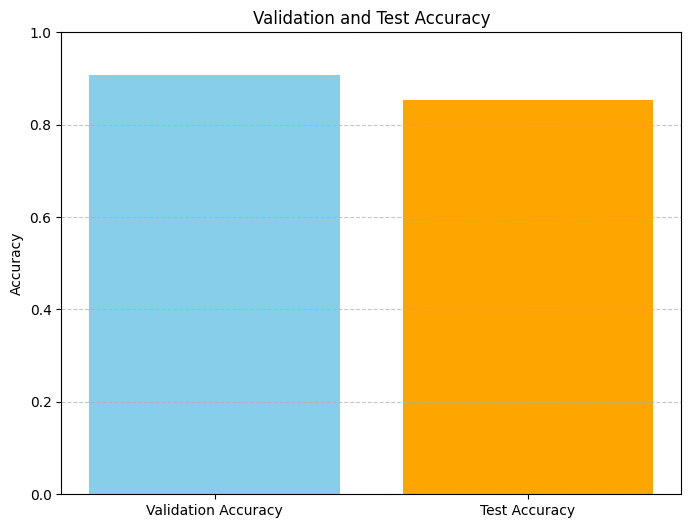

In [19]:
accuracy_metrics = {'Validation Accuracy': val_accuracy, 'Test Accuracy': test_accuracy}
plt.figure(figsize=(8, 6))
plt.bar(accuracy_metrics.keys(), accuracy_metrics.values(), color=['skyblue', 'orange'])
plt.ylabel("Accuracy")
plt.title("Validation and Test Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Bar Graph for Validation and test AUC-ROC

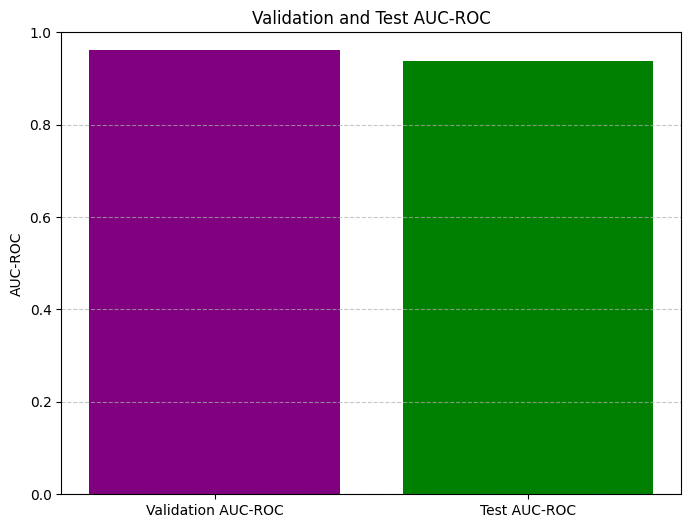

In [20]:
auc_metrics = {'Validation AUC-ROC': val_auc, 'Test AUC-ROC': test_auc}
plt.figure(figsize=(8, 6))
plt.bar(auc_metrics.keys(), auc_metrics.values(), color=['purple', 'green'])
plt.ylabel("AUC-ROC")
plt.title("Validation and Test AUC-ROC")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()